In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Cognate kinetics
k1r=718
k2f=1475
k2r_cog=2.1
k3_cog=1529
k4=209
k5_cog=200

t1r = 1000/k1r
t2f = 1000/k2f
t2r_cog = 1000/k2r_cog
t3_cog = 1000/k3_cog
t4 = 1000/k4
t5_cog = 1000/k5_cog

#Near-cognate kinetics
k1r=718
k2f=1475
k2r_nr = 1120
k3_nr = 6
k4=209

t2r_nr = 1000/k2r_nr
t3_nr = 1000/k3_nr

#Non-cognate kinetics
k1r=718

In [2]:
np.random.seed(1)
t1r_exp=np.random.exponential(t1r,size=4000)
t2f_exp=np.random.exponential(t2f,size=4000)
t2r_cog_exp=np.random.exponential(t2r_cog,size=4000)
t3_cog_exp=np.random.exponential(t3_cog,size=4000)
t4_exp=np.random.exponential(t4,size=4000)
t5_cog_exp=np.random.exponential(t5_cog,size=4000)

t2r_nr_exp=np.random.exponential(t2r_nr,size=4000)
t3_nr_exp=np.random.exponential(t3_nr,size=4000)

print(np.average(t1r_exp))
print(np.average(t2f_exp))
print(np.average(t2r_cog_exp))
print(np.average(t3_cog_exp))
print(np.average(t4_exp))
print(np.average(t5_cog_exp))
print(np.average(t2r_nr_exp))
print(np.average(t3_nr_exp))

1.3871834571507315
0.6654345668683457
476.37105150778655
0.6569705162271943
4.817620598402602
5.010373257065323
0.8973918999216336
163.4346199589107


6812
6798
10.89057503699049
0.45925828294040166
0.6798


/Users/Akshay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


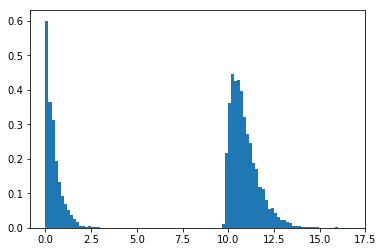

In [3]:
#Cognate calculation (distribution pulling from exponential)
#change transition probability to be based just on k not random pull. will this change solution? yes i think so.
#how does smoldyn do this? probably need to compare this calculation to smoldyn

dwelltime_cog_success = list()
dwelltime_cog_fail = list()
count = 0
count1 = 0

for i in range(10000):
    dwell_t = 0
    state=1
    while state != 0 and state != 3:
        dwell_t1r = np.random.choice(t1r_exp)
        dwell_t2f = np.random.choice(t2f_exp)
        if state==1:
            if dwell_t1r<dwell_t2f:
                dwell_t+=dwell_t1r
                dwelltime_cog_fail.append(dwell_t)
                state=0
                continue;
            else:
                dwell_t+=dwell_t2f
                state = 2
                
        if state==2:
            count+=1
            dwell_t2r_cog = np.random.choice(t2r_cog_exp)
            dwell_t3_cog = np.random.choice(t3_cog_exp)
            if dwell_t2r_cog<dwell_t3_cog:
                #dwell_t+= t2r_cog
                state = 1
            else:
                count1+=1
                dwell_t += dwell_t3_cog
                state = 3
        
        if state==3:
            dwell_t+=t4+t5_cog
            
    if state!=0: dwelltime_cog_success.append(dwell_t)

print(count)
print(count1)
plt.hist(dwelltime_cog_success+dwelltime_cog_fail,bins=100,normed=True)
print(np.mean(dwelltime_cog_success))
print(np.mean(dwelltime_cog_fail))
print(len(dwelltime_cog_success)/(len(dwelltime_cog_success)+len(dwelltime_cog_fail)))

0.44240788911324025
3267


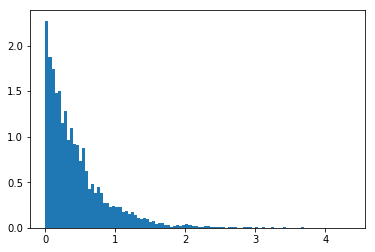

In [4]:
#Cognate calculation (distribution pulling from exponential)
dwelltime_cog_success = list()
dwelltime_cog_fail = list()
count = 0
count1 = 0
dwell_t = list()

for i in range(10000):
    state=1

    dwell_t1r = np.random.choice(t1r_exp)
    dwell_t2f = np.random.choice(t2f_exp)
    if dwell_t1r<dwell_t2f:
        dwell_t.append(dwell_t1r)
        dwelltime_cog_fail.append(dwell_t)
        state=0
        continue;
    else:
        dwell_t.append(dwell_t2f)
        state = 2

plt.hist(dwell_t,bins=100,normed=True)
print(np.mean(dwell_t))
print(len(dwelltime_cog_fail))